## Code for reading in the LEIE Exclusions list -- Capstone project

**Created by Aparna Sundaram on 09/08/19**

In [22]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression, HuberRegressor
from sklearn.model_selection import GridSearchCV, cross_val_score, cross_val_predict, train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
plt.style.use('ggplot')
%matplotlib inline

In [121]:
excl = pd.read_csv('LEIE_exclusions_list_use.csv', index_col=0)
excl=excl.reset_index()

C:\Users\aparn\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [122]:
excl.shape

(72476, 18)

In [10]:
excl.head()

,LASTNAME,FIRSTNAME,MIDNAME,BUSNAME,GENERAL,SPECIALTY,UPIN,NPI,DOB,ADDRESS,CITY,STATE,ZIP,EXCLTYPE,EXCLDATE,REINDATE,WAIVERDATE,WVRSTATE
0,NaN,NaN,,14 LAWRENCE AVE PHARMACY,PHARMACY,NaN,NaN,0,NaN,14 LAWRENCE AVENUE,SMITHTOWN,NY,11787,1128a1,19880830,0,0,NaN
1,NaN,NaN,,143 MEDICAL EQUIPMENT CO,DME COMPANY,DME - OXYGEN,NaN,0,NaN,701 NW 36 AVENUE,MIAMI,FL,33125,1128b7,19970620,0,0,NaN
2,NaN,NaN,,184TH STREET PHARMACY CORP,OTHER BUSINESS,PHARMACY,NaN,1922348218,NaN,69 E 184TH ST,BRONX,NY,10468,1128a1,20180419,0,0,NaN
3,NaN,NaN,,1951 FLATBUSH AVENUE PHARMACY,PHARMACY,NaN,NaN,0,NaN,1951 FLATBUSH AVE,BROOKLYN,NY,11234,1128b5,20090319,0,0,NaN
4,NaN,NaN,,"1ST COMMUNITY HEALTH CTR, LTD",CLINIC,NaN,NaN,0,NaN,3138 W CERMAK ROAD,CHICAGO,IL,60623,1128a1,19940524,0,0,NaN


In [123]:
excl['NPI'].nunique()

5169

In [162]:
x = excl.NPI.value_counts()
x.value_counts()

1        5070
2          97
3           2
67207       1
Name: NPI, dtype: int64

In [145]:
df = excl.set_index('NPI')
df

,LASTNAME,FIRSTNAME,MIDNAME,BUSNAME,GENERAL,SPECIALTY,UPIN,DOB,ADDRESS,CITY,STATE,ZIP,EXCLTYPE,EXCLDATE,REINDATE,WAIVERDATE,WVRSTATE
NPI,,,,,,,,,,,,,,,,,
0,NaN,NaN,,14 LAWRENCE AVE PHARMACY,PHARMACY,NaN,NaN,NaN,14 LAWRENCE AVENUE,SMITHTOWN,NY,11787,1128a1,19880830,0,0,NaN
0,NaN,NaN,,143 MEDICAL EQUIPMENT CO,DME COMPANY,DME - OXYGEN,NaN,NaN,701 NW 36 AVENUE,MIAMI,FL,33125,1128b7,19970620,0,0,NaN
1922348218,NaN,NaN,,184TH STREET PHARMACY CORP,OTHER BUSINESS,PHARMACY,NaN,NaN,69 E 184TH ST,BRONX,NY,10468,1128a1,20180419,0,0,NaN
0,NaN,NaN,,1951 FLATBUSH AVENUE PHARMACY,PHARMACY,NaN,NaN,NaN,1951 FLATBUSH AVE,BROOKLYN,NY,11234,1128b5,20090319,0,0,NaN
0,NaN,NaN,,"1ST COMMUNITY HEALTH CTR, LTD",CLINIC,NaN,NaN,NaN,3138 W CERMAK ROAD,CHICAGO,IL,60623,1128a1,19940524,0,0,NaN
0,NaN,NaN,,1ST REHABILITATION OF PORT ST,MANAGEMENT SVCS CO,NaN,NaN,NaN,C/O 3659 MAGUIRE BLVD,ORLANDO,FL,32803,1128b8,20020919,0,0,NaN
0,NaN,NaN,,2001 BATH AVENUE PHARMACY INC,OTHER BUSINESS,PHARMACY,NaN,NaN,2001 BATH AVENUE,BROOKLYN,NY,11214,1128a1,20110818,0,0,NaN
0,NaN,NaN,,"2258 PHARMACY, INC",PHARMACY,NaN,NaN,NaN,2258 THIRD AVE,NEW YORK,NY,10035,1128b8,20030720,0,0,NaN
0,NaN,NaN,,"227 NINTH AVENUE PHARMACY, INC",PHARMACY,NaN,NaN,NaN,227 9TH AVE,NEW YORK,NY,10011,1128b5,19970903,0,0,NaN


In [161]:
excl.groupby(['NPI', 'STATE'])['STATE'].agg(['count'])

count
NPI        STATE       
0          AE         1
           AK       236
           AL      1552
           AR      1035
           AZ      2341
           CA      8075
           CN         1
           CO      1411
           CT       622
           DC        81
           DE       143
           FL      6948
           FM         2
           GA      1063
           GU         1
           HA         1
           HI       151
           IA      1011
           ID       295
           IL      1977
           IN       996
           KS       552
           KY      1449
           LA      1603
           MA      1565
           MD       657
           ME       536
           MI      1172
           MN      1006
           MO       860
...                 ...
1992781660 CO         1
1992784169 NY         1
1992784698 NY         1
1992796015 VT         1
1992798086 OH         1
1992809644 CA         1
1992822332 TX         1
1992825731 PR         1
1992829923 MO         1
1992836621 NY         1
1992839039 KS         1
1992846216 WI         1
1992850416 AL         1
           AR         1
1992851836 CO         1
1992857684 IL         1
1992862452 FL         1
1992863476 CA         1
1992871354 CO         1
1992878136 MN         1
1992880801 NM         1
1992884936 LA         1
1992890636 VA         1
1992906937 MO         1
1992913073 FL         1
1992916076 FL         1
1992958078 PA         1
1992971428 OH         1
1992978571 MO         1
           NY         1

[5255 rows x 1 columns]

In [24]:
## NOt very useful here, but okay to check

#duplicate = excl[excl.duplicated()]
#duplicate

In [13]:
excl.dtypes

LASTNAME       object
FIRSTNAME      object
MIDNAME        object
BUSNAME        object
GENERAL        object
SPECIALTY      object
UPIN           object
NPI             int64
DOB           float64
ADDRESS        object
CITY           object
STATE          object
ZIP             int64
EXCLTYPE       object
EXCLDATE        int64
REINDATE        int64
WAIVERDATE      int64
WVRSTATE       object
dtype: object

In [15]:
missingRows = excl.isnull().values.any(axis=0)
missingCols = excl.isnull().values.any(axis=1)

missingRows
missingCols

array([ True,  True,  True, ...,  True,  True,  True])

In [19]:
#Convert exclusion date to a date field

excl['EXCLDATE'] = pd.to_datetime(excl['EXCLDATE'], format='%Y%m%d')

In [20]:
excl.dtypes

LASTNAME              object
FIRSTNAME             object
MIDNAME               object
BUSNAME               object
GENERAL               object
SPECIALTY             object
UPIN                  object
NPI                    int64
DOB                  float64
ADDRESS               object
CITY                  object
STATE                 object
ZIP                    int64
EXCLTYPE              object
EXCLDATE      datetime64[ns]
REINDATE               int64
WAIVERDATE             int64
WVRSTATE              object
dtype: object

In [21]:
excl.head()

,LASTNAME,FIRSTNAME,MIDNAME,BUSNAME,GENERAL,SPECIALTY,UPIN,NPI,DOB,ADDRESS,CITY,STATE,ZIP,EXCLTYPE,EXCLDATE,REINDATE,WAIVERDATE,WVRSTATE
0,NaN,NaN,,14 LAWRENCE AVE PHARMACY,PHARMACY,NaN,NaN,0,NaN,14 LAWRENCE AVENUE,SMITHTOWN,NY,11787,1128a1,1988-08-30,0,0,NaN
1,NaN,NaN,,143 MEDICAL EQUIPMENT CO,DME COMPANY,DME - OXYGEN,NaN,0,NaN,701 NW 36 AVENUE,MIAMI,FL,33125,1128b7,1997-06-20,0,0,NaN
2,NaN,NaN,,184TH STREET PHARMACY CORP,OTHER BUSINESS,PHARMACY,NaN,1922348218,NaN,69 E 184TH ST,BRONX,NY,10468,1128a1,2018-04-19,0,0,NaN
3,NaN,NaN,,1951 FLATBUSH AVENUE PHARMACY,PHARMACY,NaN,NaN,0,NaN,1951 FLATBUSH AVE,BROOKLYN,NY,11234,1128b5,2009-03-19,0,0,NaN
4,NaN,NaN,,"1ST COMMUNITY HEALTH CTR, LTD",CLINIC,NaN,NaN,0,NaN,3138 W CERMAK ROAD,CHICAGO,IL,60623,1128a1,1994-05-24,0,0,NaN


In [23]:
excl['EXCLTYPE'].value_counts()

1128b4       30622
1128a1       20361
1128a2        6813
1128a3        4041
1128a4        2783
1128b14       2298
1128b8        1492
1128a1         882
1128b1         821
1128b5         811
1128b7         599
1128b3         308
1128Aa         149
1128a3         123
1128a2          89
1128b6          66
1156            58
1128b2          53
1128b15         34
1128b7          23
1128b11         11
BRCH SA         10
1160             9
BRCH CIA         8
1128b16          3
1128b6           3
1128b2           2
1128a4           1
1128b12          1
1128b5           1
1128b1           1
Name: EXCLTYPE, dtype: int64

In [25]:
## subset the df to a new df based on exclusion types
## Select only those exclusion types that are relevant to the question.

excl2 = excl[excl['EXCLTYPE'].isin(['1128a1','1128a3','1128b1','1128b5','1128b7'])]

In [26]:
excl2.head()

,LASTNAME,FIRSTNAME,MIDNAME,BUSNAME,GENERAL,SPECIALTY,UPIN,NPI,DOB,ADDRESS,CITY,STATE,ZIP,EXCLTYPE,EXCLDATE,REINDATE,WAIVERDATE,WVRSTATE
0,NaN,NaN,,14 LAWRENCE AVE PHARMACY,PHARMACY,NaN,NaN,0,NaN,14 LAWRENCE AVENUE,SMITHTOWN,NY,11787,1128a1,1988-08-30,0,0,NaN
1,NaN,NaN,,143 MEDICAL EQUIPMENT CO,DME COMPANY,DME - OXYGEN,NaN,0,NaN,701 NW 36 AVENUE,MIAMI,FL,33125,1128b7,1997-06-20,0,0,NaN
2,NaN,NaN,,184TH STREET PHARMACY CORP,OTHER BUSINESS,PHARMACY,NaN,1922348218,NaN,69 E 184TH ST,BRONX,NY,10468,1128a1,2018-04-19,0,0,NaN
3,NaN,NaN,,1951 FLATBUSH AVENUE PHARMACY,PHARMACY,NaN,NaN,0,NaN,1951 FLATBUSH AVE,BROOKLYN,NY,11234,1128b5,2009-03-19,0,0,NaN
4,NaN,NaN,,"1ST COMMUNITY HEALTH CTR, LTD",CLINIC,NaN,NaN,0,NaN,3138 W CERMAK ROAD,CHICAGO,IL,60623,1128a1,1994-05-24,0,0,NaN


In [27]:
excl2.shape

(26633, 18)

## Read in the medicare dataset

In [28]:
medicare = pd.read_csv('medicaredf.csv')
medicare.head()

C:\Users\aparn\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,npi,nppes_provider_last_org_name,nppes_provider_first_name,nppes_provider_mi,nppes_credentials,nppes_provider_gender,nppes_entity_code,nppes_provider_street1,nppes_provider_street2,nppes_provider_city,...,hcpcs_code,hcpcs_description,hcpcs_drug_indicator,line_srvc_cnt,bene_unique_cnt,bene_day_srvc_cnt,average_Medicare_allowed_amt,average_submitted_chrg_amt,average_Medicare_payment_amt,average_Medicare_standard_amt
0,1003000126,ENKESHAFI,ARDALAN,NaN,M.D.,M,I,900 SETON DR,NaN,CUMBERLAND,...,99217,Hospital observation care discharge,N,100.0,96,100,73.398800,325.780000,56.827200,57.492400
1,1003000126,ENKESHAFI,ARDALAN,NaN,M.D.,M,I,900 SETON DR,NaN,CUMBERLAND,...,99218,Hospital observation care typically 30 minutes,N,26.0,25,26,100.080000,449.000000,78.460000,79.306154
2,1003000126,ENKESHAFI,ARDALAN,NaN,M.D.,M,I,900 SETON DR,NaN,CUMBERLAND,...,99219,Hospital observation care typically 50 minutes,N,52.0,51,52,136.380000,614.000000,102.807692,103.895385
3,1003000126,ENKESHAFI,ARDALAN,NaN,M.D.,M,I,900 SETON DR,NaN,CUMBERLAND,...,99220,Hospital observation care typically 70 minutes...,N,59.0,59,59,190.363729,755.932203,141.293559,142.865763
4,1003000126,ENKESHAFI,ARDALAN,NaN,M.D.,M,I,900 SETON DR,NaN,CUMBERLAND,...,99221,"Initial hospital inpatient care, typically 30 ...",N,16.0,16,16,101.680000,462.812500,79.710000,80.750000


In [167]:
pd.set_option("display.max_columns",500)

In [169]:
#medicare.head()

In [33]:
medicare.shape

(9847443, 26)

In [31]:
##Subset the medicare dataframe to include only those providers who are participating in medicare

medicare2 = medicare[medicare['medicare_participation_indicator'].isin(['Y'])]

In [32]:
medicare2.shape

(9844115, 26)

In [34]:
## Subset the dataset further to remove countries that are not US.

medicare2 = medicare2[medicare2['nppes_provider_country'].isin(['US'])]

In [35]:
medicare2.shape

(9843519, 26)

**Take a random sample of observations from the medicare dataset to make crosstabs etc. easier**

In [36]:
sampmed = medicare2.sample(50000)

In [37]:
sampmed.shape

(50000, 26)

## Read in the sample dataset and do some EDA on it.

In [4]:
medisamp = pd.read_csv('sample.csv', index_col=0)
medisamp.head()

C:\Users\aparn\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\aparn\Anaconda3\lib\site-packages\numpy\lib\arraysetops.py:568: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


,npi,nppes_provider_last_org_name,nppes_provider_first_name,nppes_provider_mi,nppes_credentials,nppes_provider_gender,nppes_entity_code,nppes_provider_street1,nppes_provider_street2,nppes_provider_city,...,hcpcs_code,hcpcs_description,hcpcs_drug_indicator,line_srvc_cnt,bene_unique_cnt,bene_day_srvc_cnt,average_medicare_allowed_amt,average_submitted_chrg_amt,average_medicare_payment_amt,year
8588549,1932288412,WARDEN,DAVID,R,MD,M,I,3100 CHANNING WAY,NaN,IDAHO FALLS,...,76700,Ultrasound of abdomen,N,30.0,30,30,98.726000,268.733333,72.139000,2012
178269,1013992643,DETRANA,PHILIP,M,M.D.,M,I,2414 KOHLER MEMORIAL DR,NaN,SHEBOYGAN,...,36415,Insertion of needle into vein for collection o...,N,46.0,23,46,3.000000,3.000000,3.000000,2012
4234612,1467425520,ROSO,GEORGE,NaN,M.D.,M,I,255 S DOBSON RD,SUITE 1,CHANDLER,...,90656,"Vaccine for influenza injection into muscle, p...",Y,11.0,11,11,12.389091,25.000000,11.261818,2012
7127320,1770697856,HOLLINGSWORTH,SONYA,R,M.D.,F,I,1703 N TAYLOR DR,NaN,SHEBOYGAN,...,83880,Natriuretic peptide (heart and blood vessel pr...,N,16.0,13,16,48.080000,98.000000,48.080000,2012
2563775,1275754731,ORJIOKE,NGOZIKA,A,M.D.,F,I,8901 STONEBRIDGE BLVD,SUITE 100,DOUGLASVILLE,...,99213,Established patient office or other outpatient...,N,23.0,23,23,70.930000,81.000000,56.740000,2012


In [5]:
medisamp.shape

(1200000, 26)

In [6]:
medisamp = medisamp.sort_index()

In [7]:
medisamp.head()

,npi,nppes_provider_last_org_name,nppes_provider_first_name,nppes_provider_mi,nppes_credentials,nppes_provider_gender,nppes_entity_code,nppes_provider_street1,nppes_provider_street2,nppes_provider_city,...,hcpcs_code,hcpcs_description,hcpcs_drug_indicator,line_srvc_cnt,bene_unique_cnt,bene_day_srvc_cnt,average_medicare_allowed_amt,average_submitted_chrg_amt,average_medicare_payment_amt,year
1,1003000126,ENKESHAFI,ARDALAN,NaN,M.D.,M,I,900 SETON DR,NaN,CUMBERLAND,...,99223,"Initial hospital inpatient care, typically 70 ...",N,93.0,88,93,198.590000,291.000000,158.870000,2012
6,1003000126,ENKESHAFI,ARDALAN,NaN,M.D.,M,I,900 SETON DR,NaN,CUMBERLAND,...,99223,"Initial hospital inpatient care, typically 70 ...",N,114.0,110,114,206.061579,923.991228,160.377193,2017
16,1003000134,CIBULL,THOMAS,L,M.D.,M,I,2650 RIDGE AVE,EVANSTON HOSPITAL,EVANSTON,...,88321,Surgical pathology consultation and report,N,36.0,35,36,92.550000,273.000000,68.528889,2016
51,1003000480,ROTHCHILD,KEVIN,B,MD,M,I,12605 E 16TH AVE,NaN,AURORA,...,99213,Established patient office or other outpatient...,N,13.0,13,13,49.430000,189.615385,29.929231,2013
72,1003000522,WEIGAND,FREDERICK,J,MD,M,I,1565 SAXON BLVD,SUITE 102,DELTONA,...,93000,Routine EKG using at least 12 leads including ...,N,21.0,19,21,17.010000,52.000000,13.340000,2017


In [8]:
list(medisamp.columns)
medisamp.dtypes

npi                                   int64
nppes_provider_last_org_name         object
nppes_provider_first_name            object
nppes_provider_mi                    object
nppes_credentials                    object
nppes_provider_gender                object
nppes_entity_code                    object
nppes_provider_street1               object
nppes_provider_street2               object
nppes_provider_city                  object
nppes_provider_zip                   object
nppes_provider_state                 object
nppes_provider_country               object
provider_type                        object
medicare_participation_indicator     object
place_of_service                     object
hcpcs_code                           object
hcpcs_description                    object
hcpcs_drug_indicator                 object
line_srvc_cnt                       float64
bene_unique_cnt                       int64
bene_day_srvc_cnt                     int64
average_medicare_allowed_amt    

In [55]:
#view the line_srvc_cnt column along with the hcpcs code and description columns.

medisamp.loc[:,['hcpcs_code','hcpcs_description','line_srvc_cnt','average_submitted_chrg_amt','average_medicare_payment_amt']]

,hcpcs_code,hcpcs_description,line_srvc_cnt,average_submitted_chrg_amt,average_medicare_payment_amt
1,99223,"Initial hospital inpatient care, typically 70 ...",93.0,291.000000,158.870000
6,99223,"Initial hospital inpatient care, typically 70 ...",114.0,923.991228,160.377193
16,88321,Surgical pathology consultation and report,36.0,273.000000,68.528889
51,99213,Established patient office or other outpatient...,13.0,189.615385,29.929231
72,93000,Routine EKG using at least 12 leads including ...,21.0,52.000000,13.340000
85,99213,Established patient office or other outpatient...,131.0,120.000000,45.204351
89,81002,"Urinalysis, manual test",15.0,10.000000,3.620000
96,99232,"Subsequent hospital inpatient care, typically ...",554.0,101.000000,53.716679
99,96372,Injection beneath the skin or into muscle for ...,59.0,44.000000,17.184576
107,99213,Established patient office or other outpatient...,193.0,150.000000,49.381399


In [58]:
#view the line_srvc_cnt column along with the hcpcs code and description columns.

medisamp.loc[:,['hcpcs_code','hcpcs_description','bene_day_srvc_cnt','line_srvc_cnt','bene_unique_cnt']]

,hcpcs_code,hcpcs_description,bene_day_srvc_cnt,line_srvc_cnt,bene_unique_cnt
1,99223,"Initial hospital inpatient care, typically 70 ...",93,93.0,88
6,99223,"Initial hospital inpatient care, typically 70 ...",114,114.0,110
16,88321,Surgical pathology consultation and report,36,36.0,35
51,99213,Established patient office or other outpatient...,13,13.0,13
72,93000,Routine EKG using at least 12 leads including ...,21,21.0,19
85,99213,Established patient office or other outpatient...,131,131.0,103
89,81002,"Urinalysis, manual test",15,15.0,11
96,99232,"Subsequent hospital inpatient care, typically ...",554,554.0,188
99,96372,Injection beneath the skin or into muscle for ...,59,59.0,12
107,99213,Established patient office or other outpatient...,193,193.0,137


In [9]:
medisamp.describe()

,npi,line_srvc_cnt,bene_unique_cnt,bene_day_srvc_cnt,average_medicare_allowed_amt,average_submitted_chrg_amt,average_medicare_payment_amt,year
count,1.200000e+06,1.200000e+06,1.200000e+06,1.200000e+06,1.200000e+06,1.200000e+06,1.200000e+06,1.200000e+06
mean,1.499898e+09,2.361547e+02,8.928942e+01,1.456026e+02,9.896318e+01,3.240190e+02,7.591212e+01,2.014500e+03
std,2.879001e+08,3.551536e+03,1.067159e+03,2.066742e+03,2.365174e+02,9.092088e+02,1.845142e+02,1.707826e+00
min,1.003000e+09,9.500000e+00,1.100000e+01,1.100000e+01,1.666667e-04,1.666667e-04,0.000000e+00,2.012000e+03
25%,1.245642e+09,2.100000e+01,1.700000e+01,2.000000e+01,2.305000e+01,5.300000e+01,1.844181e+01,2.013000e+03
50%,1.508013e+09,4.400000e+01,3.300000e+01,4.100000e+01,6.259000e+01,1.340000e+02,4.553958e+01,2.014500e+03
75%,1.750304e+09,1.200000e+02,7.600000e+01,1.090000e+02,1.120400e+02,2.750000e+02,8.398448e+01,2.016000e+03
max,1.993000e+09,1.240597e+06,3.631420e+05,9.759500e+05,3.927928e+04,9.990000e+04,3.078999e+04,2.017000e+03


In [10]:
medisamp['tot_med_payment'] = medisamp.bene_day_srvc_cnt * medisamp.average_medicare_payment_amt

In [12]:
medisamp['tot_med_chrg'] = medisamp.bene_day_srvc_cnt * medisamp.average_submitted_chrg_amt

In [13]:
medisamp.head()

,npi,nppes_provider_last_org_name,nppes_provider_first_name,nppes_provider_mi,nppes_credentials,nppes_provider_gender,nppes_entity_code,nppes_provider_street1,nppes_provider_street2,nppes_provider_city,...,hcpcs_drug_indicator,line_srvc_cnt,bene_unique_cnt,bene_day_srvc_cnt,average_medicare_allowed_amt,average_submitted_chrg_amt,average_medicare_payment_amt,year,tot_med_payment,tot_med_chrg
1,1003000126,ENKESHAFI,ARDALAN,NaN,M.D.,M,I,900 SETON DR,NaN,CUMBERLAND,...,N,93.0,88,93,198.590000,291.000000,158.870000,2012,14774.91,27063.0
6,1003000126,ENKESHAFI,ARDALAN,NaN,M.D.,M,I,900 SETON DR,NaN,CUMBERLAND,...,N,114.0,110,114,206.061579,923.991228,160.377193,2017,18283.00,105335.0
16,1003000134,CIBULL,THOMAS,L,M.D.,M,I,2650 RIDGE AVE,EVANSTON HOSPITAL,EVANSTON,...,N,36.0,35,36,92.550000,273.000000,68.528889,2016,2467.04,9828.0
51,1003000480,ROTHCHILD,KEVIN,B,MD,M,I,12605 E 16TH AVE,NaN,AURORA,...,N,13.0,13,13,49.430000,189.615385,29.929231,2013,389.08,2465.0
72,1003000522,WEIGAND,FREDERICK,J,MD,M,I,1565 SAXON BLVD,SUITE 102,DELTONA,...,N,21.0,19,21,17.010000,52.000000,13.340000,2017,280.14,1092.0


In [51]:
medisamp['tot_med_chrg'].describe()

count    1.200000e+06
mean     2.677645e+04
std      2.729986e+05
min      4.166667e-03
25%      2.229000e+03
50%      6.490000e+03
75%      2.002500e+04
max      1.749839e+08
Name: tot_med_chrg, dtype: float64

In [52]:
medisamp['tot_med_payment'].describe()

count    1.200000e+06
mean     7.452950e+03
std      5.754686e+04
min      0.000000e+00
25%      6.878400e+02
50%      1.965000e+03
75%      5.759355e+03
max      3.236106e+07
Name: tot_med_payment, dtype: float64

In [53]:
medisamp['tot_med_chrg'] = medisamp['tot_med_chrg'] + 1

In [54]:
medisamp['tot_med_payment'] = medisamp['tot_med_payment'] + 1

In [57]:
medisamp['ratio_chrg_pay'] = medisamp.tot_med_chrg/medisamp.tot_med_payment

In [58]:
medisamp['tot_med_chrg'].describe()

count    1.200000e+06
mean     2.677745e+04
std      2.729986e+05
min      1.004167e+00
25%      2.230000e+03
50%      6.491000e+03
75%      2.002600e+04
max      1.749839e+08
Name: tot_med_chrg, dtype: float64

In [59]:
medisamp['tot_med_payment'].describe()

count    1.200000e+06
mean     7.453950e+03
std      5.754686e+04
min      1.000000e+00
25%      6.888400e+02
50%      1.966000e+03
75%      5.760355e+03
max      3.236107e+07
Name: tot_med_payment, dtype: float64

In [60]:
medisamp['ratio_chrg_pay'].describe()

count    1.200000e+06
mean     4.780628e+00
std      1.964534e+01
min      7.816055e-01
25%      2.154154e+00
50%      3.226935e+00
75%      4.997674e+00
max      1.393223e+04
Name: ratio_chrg_pay, dtype: float64

In [27]:
medisamp = medisamp.drop(['nppes_provider_last_org_name', 'nppes_provider_first_name', 'nppes_provider_mi', 
               'nppes_credentials', 'nppes_provider_street1', 'nppes_provider_street2', 
               'nppes_provider_city', 'nppes_provider_country'], axis=1)          

In [17]:
medisamp.head()

,npi,nppes_provider_gender,nppes_entity_code,nppes_provider_zip,nppes_provider_state,provider_type,medicare_participation_indicator,place_of_service,hcpcs_code,hcpcs_description,...,line_srvc_cnt,bene_unique_cnt,bene_day_srvc_cnt,average_medicare_allowed_amt,average_submitted_chrg_amt,average_medicare_payment_amt,year,tot_med_payment,tot_med_chrg,ratio_chrg_pay
1,1003000126,M,I,215021854,MD,Internal Medicine,Y,F,99223,"Initial hospital inpatient care, typically 70 ...",...,93.0,88,93,198.590000,291.000000,158.870000,2012,14774.91,27063.0,1.831686
6,1003000126,M,I,215021854,MD,Internal Medicine,Y,F,99223,"Initial hospital inpatient care, typically 70 ...",...,114.0,110,114,206.061579,923.991228,160.377193,2017,18283.00,105335.0,5.761363
16,1003000134,M,I,6.02012e+08,IL,Pathology,Y,F,88321,Surgical pathology consultation and report,...,36.0,35,36,92.550000,273.000000,68.528889,2016,2467.04,9828.0,3.983721
51,1003000480,M,I,800452545,CO,General Surgery,Y,F,99213,Established patient office or other outpatient...,...,13.0,13,13,49.430000,189.615385,29.929231,2013,389.08,2465.0,6.335458
72,1003000522,M,I,3.27256e+08,FL,Family Practice,Y,O,93000,Routine EKG using at least 12 leads including ...,...,21.0,19,21,17.010000,52.000000,13.340000,2017,280.14,1092.0,3.898051


In [19]:
list(medisamp.columns)

['npi',
 'nppes_provider_gender',
 'nppes_entity_code',
 'nppes_provider_zip',
 'nppes_provider_state',
 'provider_type',
 'medicare_participation_indicator',
 'place_of_service',
 'hcpcs_code',
 'hcpcs_description',
 'hcpcs_drug_indicator',
 'line_srvc_cnt',
 'bene_unique_cnt',
 'bene_day_srvc_cnt',
 'average_medicare_allowed_amt',
 'average_submitted_chrg_amt',
 'average_medicare_payment_amt',
 'year',
 'tot_med_payment',
 'tot_med_chrg',
 'ratio_chrg_pay']

In [30]:
medisamp.dtypes

npi                                   int64
nppes_provider_gender                object
nppes_entity_code                    object
nppes_provider_zip                   object
nppes_provider_state                 object
provider_type                        object
medicare_participation_indicator     object
place_of_service                     object
hcpcs_code                           object
hcpcs_description                    object
hcpcs_drug_indicator                 object
line_srvc_cnt                       float64
bene_unique_cnt                       int64
bene_day_srvc_cnt                     int64
average_medicare_allowed_amt        float64
average_submitted_chrg_amt          float64
average_medicare_payment_amt        float64
year                                  int64
tot_med_payment                     float64
tot_med_chrg                        float64
ratio_chrg_pay                      float64
dtype: object

In [114]:
from __future__ import print_function
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing

from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn import metrics
from scipy.spatial.distance import cdist

from sklearn.cluster import KMeans
kmeans = KMeans()

In [44]:
medisamp = medisamp.drop(columns=['hcpcs_description'])  

In [32]:
medisamp = medisamp.drop(['nppes_provider_gender',               
'nppes_entity_code',                   
'nppes_provider_zip',                  
'nppes_provider_state',                 
'provider_type',                        
'medicare_participation_indicator',    
'place_of_service',                     
'hcpcs_code',                                      
'hcpcs_drug_indicator'], axis=1)                  

In [45]:
list(medisamp.columns)

['npi',
 'line_srvc_cnt',
 'bene_unique_cnt',
 'bene_day_srvc_cnt',
 'average_medicare_allowed_amt',
 'average_submitted_chrg_amt',
 'average_medicare_payment_amt',
 'year',
 'tot_med_payment',
 'tot_med_chrg',
 'ratio_chrg_pay']

In [46]:
medisamp.dtypes

npi                               int64
line_srvc_cnt                   float64
bene_unique_cnt                   int64
bene_day_srvc_cnt                 int64
average_medicare_allowed_amt    float64
average_submitted_chrg_amt      float64
average_medicare_payment_amt    float64
year                              int64
tot_med_payment                 float64
tot_med_chrg                    float64
ratio_chrg_pay                  float64
dtype: object

In [55]:
medisamp.columns[medisamp.isnull().any()]

Index([], dtype='object')

In [56]:
## Double-checking the code above
medisamp.columns[medisamp.isnull().sum(axis=0)>0]

Index([], dtype='object')

In [61]:
medisamp.describe()

,npi,line_srvc_cnt,bene_unique_cnt,bene_day_srvc_cnt,average_medicare_allowed_amt,average_submitted_chrg_amt,average_medicare_payment_amt,year,tot_med_payment,tot_med_chrg,ratio_chrg_pay
count,1.200000e+06,1.200000e+06,1.200000e+06,1.200000e+06,1.200000e+06,1.200000e+06,1.200000e+06,1.200000e+06,1.200000e+06,1.200000e+06,1.200000e+06
mean,1.499898e+09,2.361547e+02,8.928942e+01,1.456026e+02,9.896318e+01,3.240190e+02,7.591212e+01,2.014500e+03,7.453950e+03,2.677745e+04,4.780628e+00
std,2.879001e+08,3.551536e+03,1.067159e+03,2.066742e+03,2.365174e+02,9.092088e+02,1.845142e+02,1.707826e+00,5.754686e+04,2.729986e+05,1.964534e+01
min,1.003000e+09,9.500000e+00,1.100000e+01,1.100000e+01,1.666667e-04,1.666667e-04,0.000000e+00,2.012000e+03,1.000000e+00,1.004167e+00,7.816055e-01
25%,1.245642e+09,2.100000e+01,1.700000e+01,2.000000e+01,2.305000e+01,5.300000e+01,1.844181e+01,2.013000e+03,6.888400e+02,2.230000e+03,2.154154e+00
50%,1.508013e+09,4.400000e+01,3.300000e+01,4.100000e+01,6.259000e+01,1.340000e+02,4.553958e+01,2.014500e+03,1.966000e+03,6.491000e+03,3.226935e+00
75%,1.750304e+09,1.200000e+02,7.600000e+01,1.090000e+02,1.120400e+02,2.750000e+02,8.398448e+01,2.016000e+03,5.760355e+03,2.002600e+04,4.997674e+00
max,1.993000e+09,1.240597e+06,3.631420e+05,9.759500e+05,3.927928e+04,9.990000e+04,3.078999e+04,2.017000e+03,3.236107e+07,1.749839e+08,1.393223e+04


In [88]:
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(medisamp)
    kmeanModel.fit(medisamp)

In [89]:
kmeans.cluster_centers_

array([[1.47279972e+09, 2.19286651e+02, 8.29470420e+01, 1.34587277e+02,
        1.01247576e+02, 3.31845433e+02, 7.76867181e+01, 2.01450860e+03,
        7.63051975e+03, 2.69275562e+04, 4.71574644e+00],
       [1.93746177e+09, 2.45736125e+02, 9.81565559e+01, 1.56118982e+02,
        9.84595085e+01, 3.23968241e+02, 7.55366998e+01, 2.01449329e+03,
        7.45463994e+03, 2.72493461e+04, 4.93075558e+00],
       [1.14950634e+09, 2.22475400e+02, 8.39055586e+01, 1.35831352e+02,
        9.83805640e+01, 3.22065580e+02, 7.54124744e+01, 2.01450065e+03,
        7.17400573e+03, 2.58226361e+04, 4.73029314e+00],
       [1.70906048e+09, 2.42575220e+02, 8.65453827e+01, 1.43226186e+02,
        9.91275221e+01, 3.22583744e+02, 7.60280012e+01, 2.01450146e+03,
        7.67315595e+03, 2.70240364e+04, 4.74054965e+00],
       [1.35656570e+09, 2.47840136e+02, 8.94122322e+01, 1.52503558e+02,
        9.94249269e+01, 3.24364966e+02, 7.62681513e+01, 2.01448955e+03,
        7.60702268e+03, 2.76172340e+04, 4.74926883e+

In [90]:
kmeans.labels_

array([6, 6, 6, ..., 1, 1, 1])

In [85]:
#Import the plottingfunctions.py file from drive

from PlottingFunctions import plot_inertia, plot_silhouette

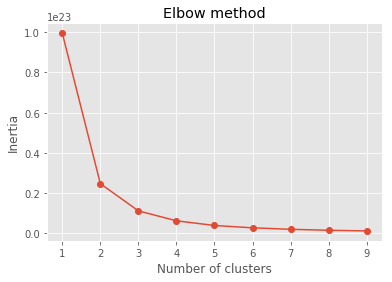

In [91]:
plot_inertia(kmeans, medisamp, range(1, 10))

In [105]:
medisamp['linesvc_scaled'] = preprocessing.scale(medisamp.line_srvc_cnt)
medisamp['benunqc_scaled'] = preprocessing.scale(medisamp.bene_unique_cnt)
medisamp['bendayc_scaled'] = preprocessing.scale(medisamp.bene_day_srvc_cnt)
medisamp['avgmedal_scaled'] = preprocessing.scale(medisamp.average_medicare_allowed_amt)
medisamp['avgmedcr_scaled'] = preprocessing.scale(medisamp.average_submitted_chrg_amt)
medisamp['avgmedpay_scaled'] = preprocessing.scale(medisamp.average_medicare_payment_amt)
medisamp['totmedpay_scaled'] = preprocessing.scale(medisamp.tot_med_payment)
medisamp['totmedcrg_scaled'] = preprocessing.scale(medisamp.tot_med_chrg)
medisamp['ratio_scaled'] = preprocessing.scale(medisamp.ratio_chrg_pay)             

C:\Users\aparn\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)
C:\Users\aparn\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


In [106]:
medisamp.dtypes

npi                               int64
line_srvc_cnt                   float64
bene_unique_cnt                   int64
bene_day_srvc_cnt                 int64
average_medicare_allowed_amt    float64
average_submitted_chrg_amt      float64
average_medicare_payment_amt    float64
year                              int64
tot_med_payment                 float64
tot_med_chrg                    float64
ratio_chrg_pay                  float64
linesvc_scaled                  float64
benunqc_scaled                  float64
bendayc_scaled                  float64
avgmedal_scaled                 float64
avgmedcr_scaled                 float64
avgmedpay_scaled                float64
totmedpay_scaled                float64
totmedcrg_scaled                float64
ratio_scaled                    float64
dtype: object

In [107]:
medisamp.describe()

,npi,line_srvc_cnt,bene_unique_cnt,bene_day_srvc_cnt,average_medicare_allowed_amt,average_submitted_chrg_amt,average_medicare_payment_amt,year,tot_med_payment,tot_med_chrg,ratio_chrg_pay,linesvc_scaled,benunqc_scaled,bendayc_scaled,avgmedal_scaled,avgmedcr_scaled,avgmedpay_scaled,totmedpay_scaled,totmedcrg_scaled,ratio_scaled
count,1.200000e+06,1.200000e+06,1.200000e+06,1.200000e+06,1.200000e+06,1.200000e+06,1.200000e+06,1.200000e+06,1.200000e+06,1.200000e+06,1.200000e+06,1.200000e+06,1.200000e+06,1.200000e+06,1.200000e+06,1.200000e+06,1.200000e+06,1.200000e+06,1.200000e+06,1.200000e+06
mean,1.499898e+09,2.361547e+02,8.928942e+01,1.456026e+02,9.896318e+01,3.240190e+02,7.591212e+01,2.014500e+03,7.453950e+03,2.677745e+04,4.780628e+00,7.288078e-17,-2.214203e-16,-2.318665e-16,9.353338e-17,1.902499e-16,-1.395670e-16,-1.816575e-17,-1.363530e-17,1.063045e-16
std,2.879001e+08,3.551536e+03,1.067159e+03,2.066742e+03,2.365174e+02,9.092088e+02,1.845142e+02,1.707826e+00,5.754686e+04,2.729986e+05,1.964534e+01,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,1.003000e+09,9.500000e+00,1.100000e+01,1.100000e+01,1.666667e-04,1.666667e-04,0.000000e+00,2.012000e+03,1.000000e+00,1.004167e+00,7.816055e-01,-6.381880e-02,-7.336248e-02,-6.512797e-02,-4.184176e-01,-3.563747e-01,-4.114163e-01,-1.295110e-01,-9.808278e-02,-2.035609e-01
25%,1.245642e+09,2.100000e+01,1.700000e+01,2.000000e+01,2.305000e+01,5.300000e+01,1.844181e+01,2.013000e+03,6.888400e+02,2.230000e+03,2.154154e+00,-6.058077e-02,-6.774007e-02,-6.077328e-02,-3.209624e-01,-2.980824e-01,-3.114683e-01,-1.175583e-01,-8.991792e-02,-1.336946e-01
50%,1.508013e+09,4.400000e+01,3.300000e+01,4.100000e+01,6.259000e+01,1.340000e+02,4.553958e+01,2.014500e+03,1.966000e+03,6.491000e+03,3.226935e+00,-5.410469e-02,-5.274699e-02,-5.061236e-02,-1.537865e-01,-2.089939e-01,-1.646082e-01,-9.536494e-02,-7.430977e-02,-7.908712e-02
75%,1.750304e+09,1.200000e+02,7.600000e+01,1.090000e+02,1.120400e+02,2.750000e+02,8.398448e+01,2.016000e+03,5.760355e+03,2.002600e+04,4.997674e+00,-3.270549e-02,-1.245309e-02,-1.771031e-02,5.528907e-02,-5.391397e-02,4.374929e-02,-2.942986e-02,-2.473074e-02,1.104817e-02
max,1.993000e+09,1.240597e+06,3.631420e+05,9.759500e+05,3.927928e+04,9.990000e+04,3.078999e+04,2.017000e+03,3.236107e+07,1.749839e+08,1.393223e+04,3.492465e+02,3.402049e+02,4.721465e+02,1.656552e+02,1.095194e+02,1.664592e+02,5.622136e+02,6.408721e+02,7.089443e+02


In [108]:
medisamp = medisamp.drop(['line_srvc_cnt',               
'bene_unique_cnt',                   
'bene_day_srvc_cnt',                  
'average_medicare_allowed_amt',                 
'average_submitted_chrg_amt',                        
'average_medicare_payment_amt',    
'tot_med_payment',                     
'tot_med_chrg',                                      
'ratio_chrg_pay'], axis=1)                  

In [117]:
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(medisamp)
    kmeanModel.fit(medisamp)

In [118]:
kmeanModel.cluster_centers_

array([[ 1.35656570e+09,  2.01448955e+03,  3.29025673e-03,
         1.15078635e-04,  3.33903966e-03,  1.95228693e-03,
         3.80478004e-04,  1.92958710e-03,  2.65995936e-03,
         3.07613933e-03, -1.59628852e-03],
       [ 1.81591623e+09,  2.01450214e+03, -2.55658729e-03,
        -8.67919317e-03, -7.53041133e-03, -1.60696428e-03,
         3.21936706e-04, -1.68442204e-03, -6.32518418e-03,
        -5.06006443e-03,  8.41078039e-04],
       [ 1.14950634e+09,  2.01450065e+03, -3.85165214e-03,
        -5.04504636e-03, -4.72786713e-03, -2.46330042e-03,
        -2.14851998e-03, -2.70787306e-03, -4.86464145e-03,
        -3.49751661e-03, -2.56220181e-03],
       [ 1.57853413e+09,  2.01450957e+03,  3.46637173e-03,
         9.65911892e-03,  7.71219098e-03, -4.03526314e-03,
         4.57773959e-05, -3.73575996e-03, -6.37733741e-04,
         9.14342643e-04,  1.64892566e-03],
       [ 1.04869167e+09,  2.01449807e+03, -7.37443551e-04,
        -9.99096160e-04, -5.64270434e-04,  2.17645355e-03,
  

In [119]:
kmeanModel.labels_

array([4, 4, 4, ..., 5, 5, 5])

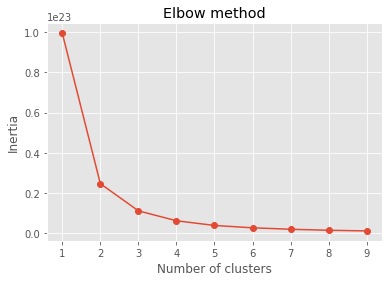

In [120]:
plot_inertia(kmeanModel, medisamp, range(1, 10))